In [36]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out
    
    
class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)
    

In [37]:
netG = ResNetGenerator()

In [38]:

model_path = 'horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
print(model_data.keys())
netG.load_state_dict(model_data)

dict_keys(['model.1.weight', 'model.1.bias', 'model.4.weight', 'model.4.bias', 'model.7.weight', 'model.7.bias', 'model.10.conv_block.1.weight', 'model.10.conv_block.1.bias', 'model.10.conv_block.5.weight', 'model.10.conv_block.5.bias', 'model.11.conv_block.1.weight', 'model.11.conv_block.1.bias', 'model.11.conv_block.5.weight', 'model.11.conv_block.5.bias', 'model.12.conv_block.1.weight', 'model.12.conv_block.1.bias', 'model.12.conv_block.5.weight', 'model.12.conv_block.5.bias', 'model.13.conv_block.1.weight', 'model.13.conv_block.1.bias', 'model.13.conv_block.5.weight', 'model.13.conv_block.5.bias', 'model.14.conv_block.1.weight', 'model.14.conv_block.1.bias', 'model.14.conv_block.5.weight', 'model.14.conv_block.5.bias', 'model.15.conv_block.1.weight', 'model.15.conv_block.1.bias', 'model.15.conv_block.5.weight', 'model.15.conv_block.5.bias', 'model.16.conv_block.1.weight', 'model.16.conv_block.1.bias', 'model.16.conv_block.5.weight', 'model.16.conv_block.5.bias', 'model.17.conv_bloc

<All keys matched successfully>

In [39]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [40]:
from PIL import Image
from torchvision import transforms

In [41]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])

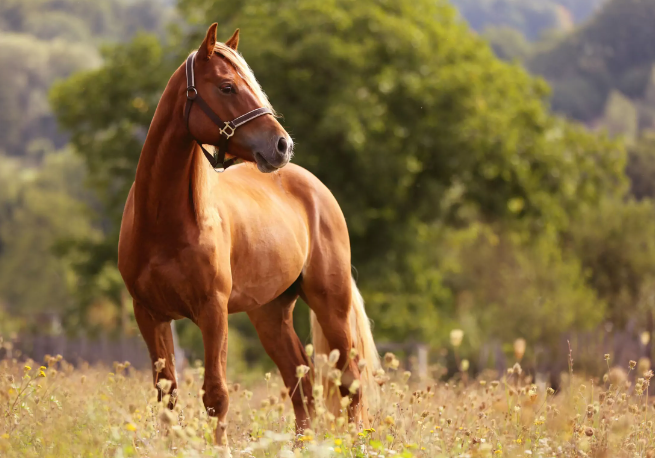

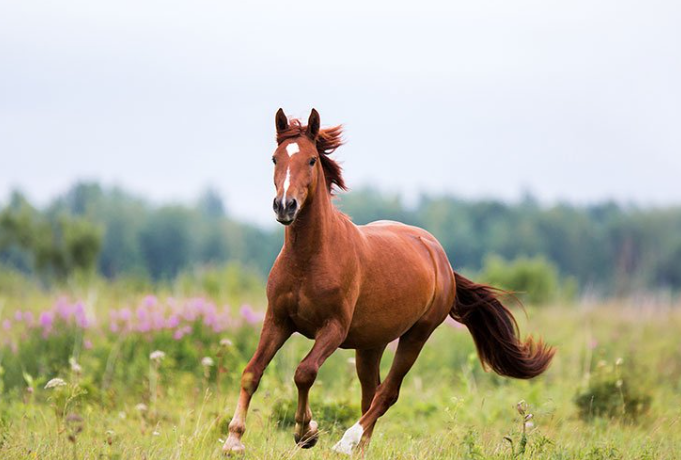

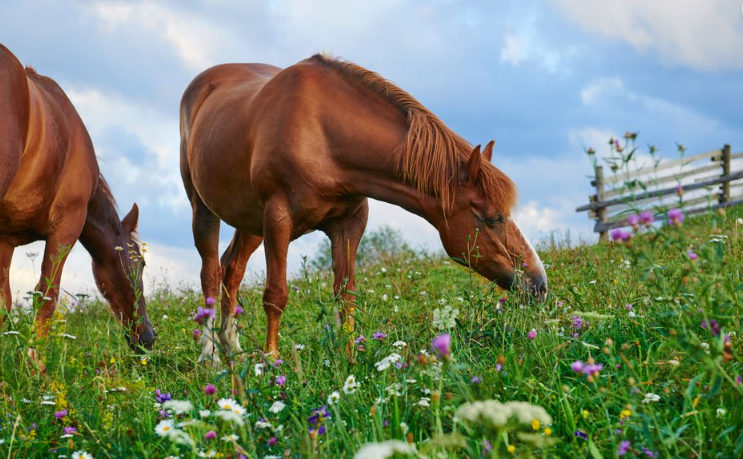

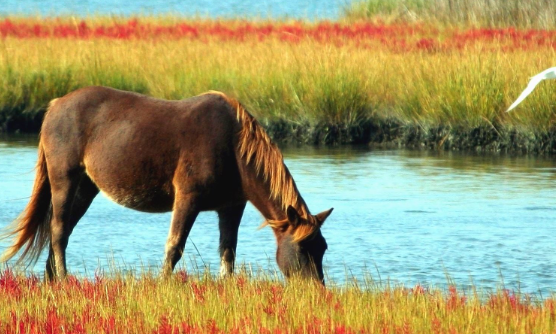

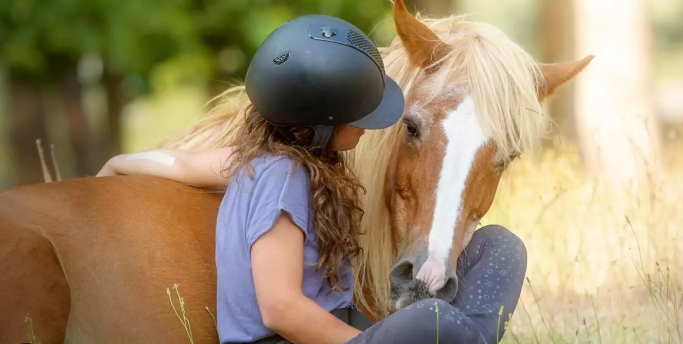

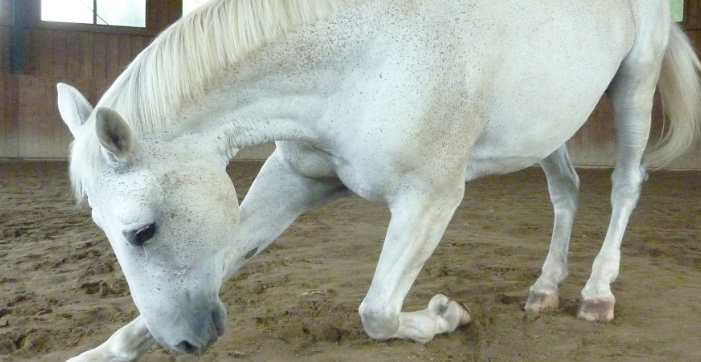

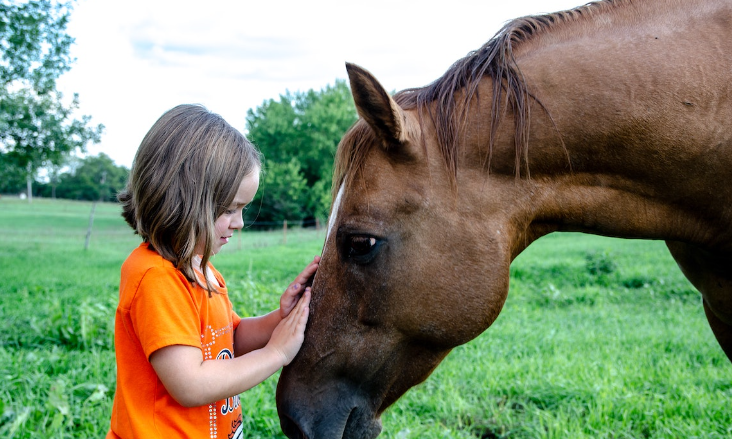

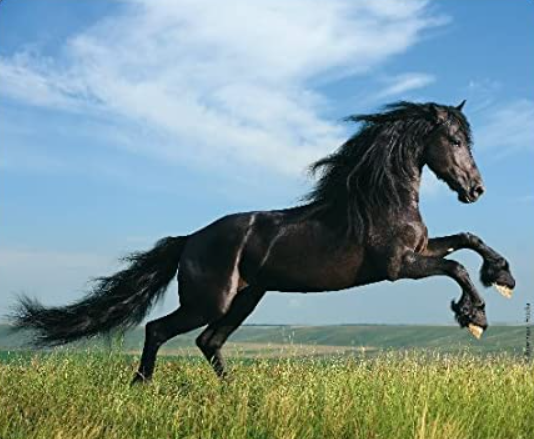

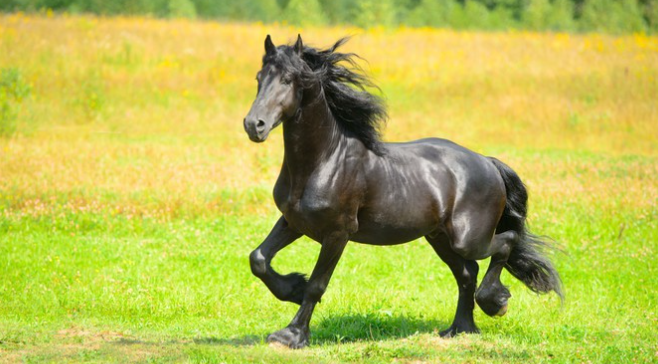

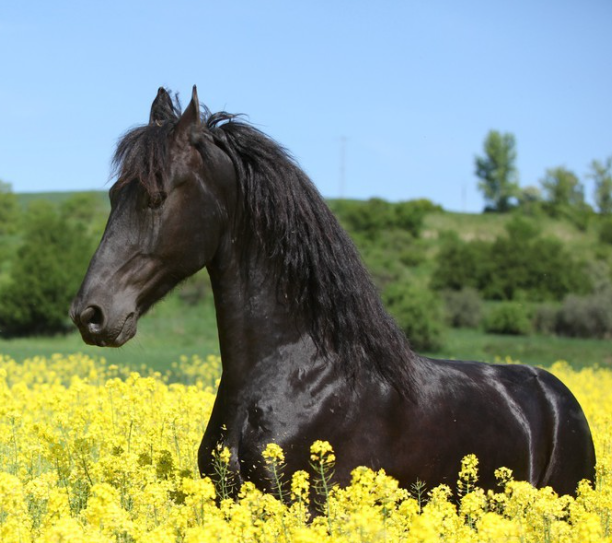

In [52]:
from PIL import Image

# Liste der Bildpfade
image_paths = ['/Users/FHBBook/Desktop/pferd1.png','/Users/FHBBook/Desktop/pferd2.png', '/Users/FHBBook/Desktop/pferd3.png', '/Users/FHBBook/Desktop/pferd4.png', '/Users/FHBBook/Desktop/pferd5.png', '/Users/FHBBook/Desktop/pferd6.png', '/Users/FHBBook/Desktop/pferd7.png', '/Users/FHBBook/Desktop/pferd8.png', '/Users/FHBBook/Desktop/pferd9.png', '/Users/FHBBook/Desktop/pferd10.png'] # Namen der Bilder


# Leere Liste zur Speicherung der geöffneten Bilder

images = []

# Schleife zur Öffnung der Bilder und Speicherung in der Liste
for i, image_path in enumerate(image_paths):
    # Öffnen des Bildes und Konvertierung in RGB
    img = Image.open(image_path).convert('RGB')
    # Hinzufügen des geöffneten Bildes zur Liste
    images.append(img)
    
    # Anzeigen des geöffneten Bildes im Jupyter Notebook
    display(img)


In [48]:
image_paths = ['/Users/FHBBook/Desktop/pferd1.png','/Users/FHBBook/Desktop/pferd2.png', '/Users/FHBBook/Desktop/pferd3.png', '/Users/FHBBook/Desktop/pferd4.png', '/Users/FHBBook/Desktop/pferd5.png', '/Users/FHBBook/Desktop/pferd6.png', '/Users/FHBBook/Desktop/pferd7.png', '/Users/FHBBook/Desktop/pferd8.png', '/Users/FHBBook/Desktop/pferd9.png', '/Users/FHBBook/Desktop/pferd10.png'] # Namen der Bilder

# Schleife über die Bilder
for i, image_path in enumerate(image_paths):
    img = Image.open(image_path).convert('RGB')
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    batch_out = netG(batch_t)
    out_t = (batch_out.data.squeeze() + 1.0) / 2.0
    out_img = transforms.ToPILImage()(out_t)
    out_img.save(f'result_{i+1}.jpg')



Generiertes Bild 1:


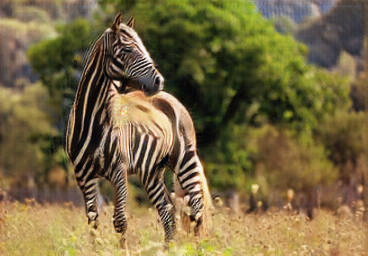

Generiertes Bild 2:


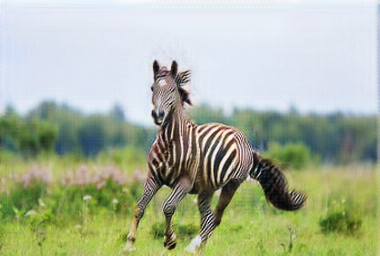

Generiertes Bild 3:


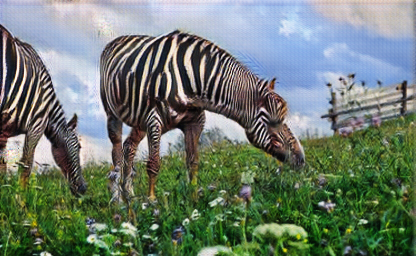

Generiertes Bild 4:


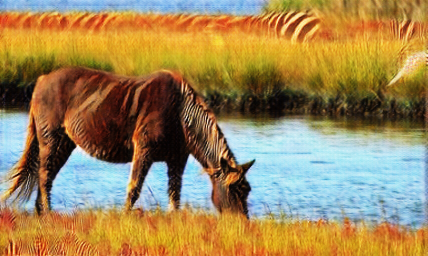

Generiertes Bild 5:


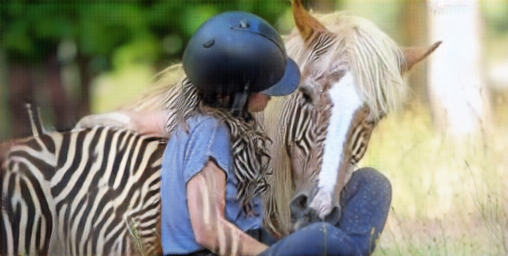

Generiertes Bild 6:


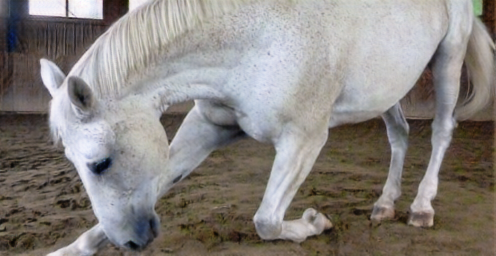

Generiertes Bild 7:


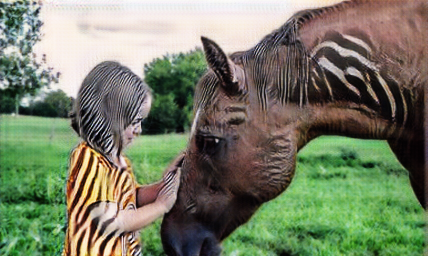

Generiertes Bild 8:


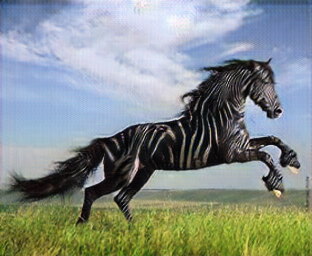

Generiertes Bild 9:


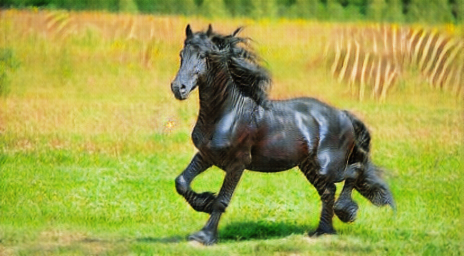

Generiertes Bild 10:


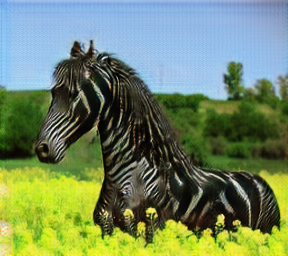

In [49]:
from IPython.display import display
from torchvision import transforms

# Liste der Bildpfade
image_paths = ['/Users/FHBBook/Desktop/pferd1.png','/Users/FHBBook/Desktop/pferd2.png', '/Users/FHBBook/Desktop/pferd3.png', '/Users/FHBBook/Desktop/pferd4.png', '/Users/FHBBook/Desktop/pferd5.png', '/Users/FHBBook/Desktop/pferd6.png', '/Users/FHBBook/Desktop/pferd7.png', '/Users/FHBBook/Desktop/pferd8.png', '/Users/FHBBook/Desktop/pferd9.png', '/Users/FHBBook/Desktop/pferd10.png'] # Namen der Bilder

# Schleife zur Generierung und Anzeige von Bildern
for i, image_path in enumerate(image_paths):
    # Öffnen und konvertieren des Bildes
    img = Image.open(image_path).convert('RGB')
    img_t = preprocess(img)
    
    # Generieren des Bildes
    batch_t = torch.unsqueeze(img_t, 0)
    batch_out = netG(batch_t)
    out_t = (batch_out.data.squeeze() + 1.0) / 2.0
    out_img = transforms.ToPILImage()(out_t)
    
    # Anzeigen des generierten Bildes
    print(f"Generiertes Bild {i+1}:")
    display(out_img)